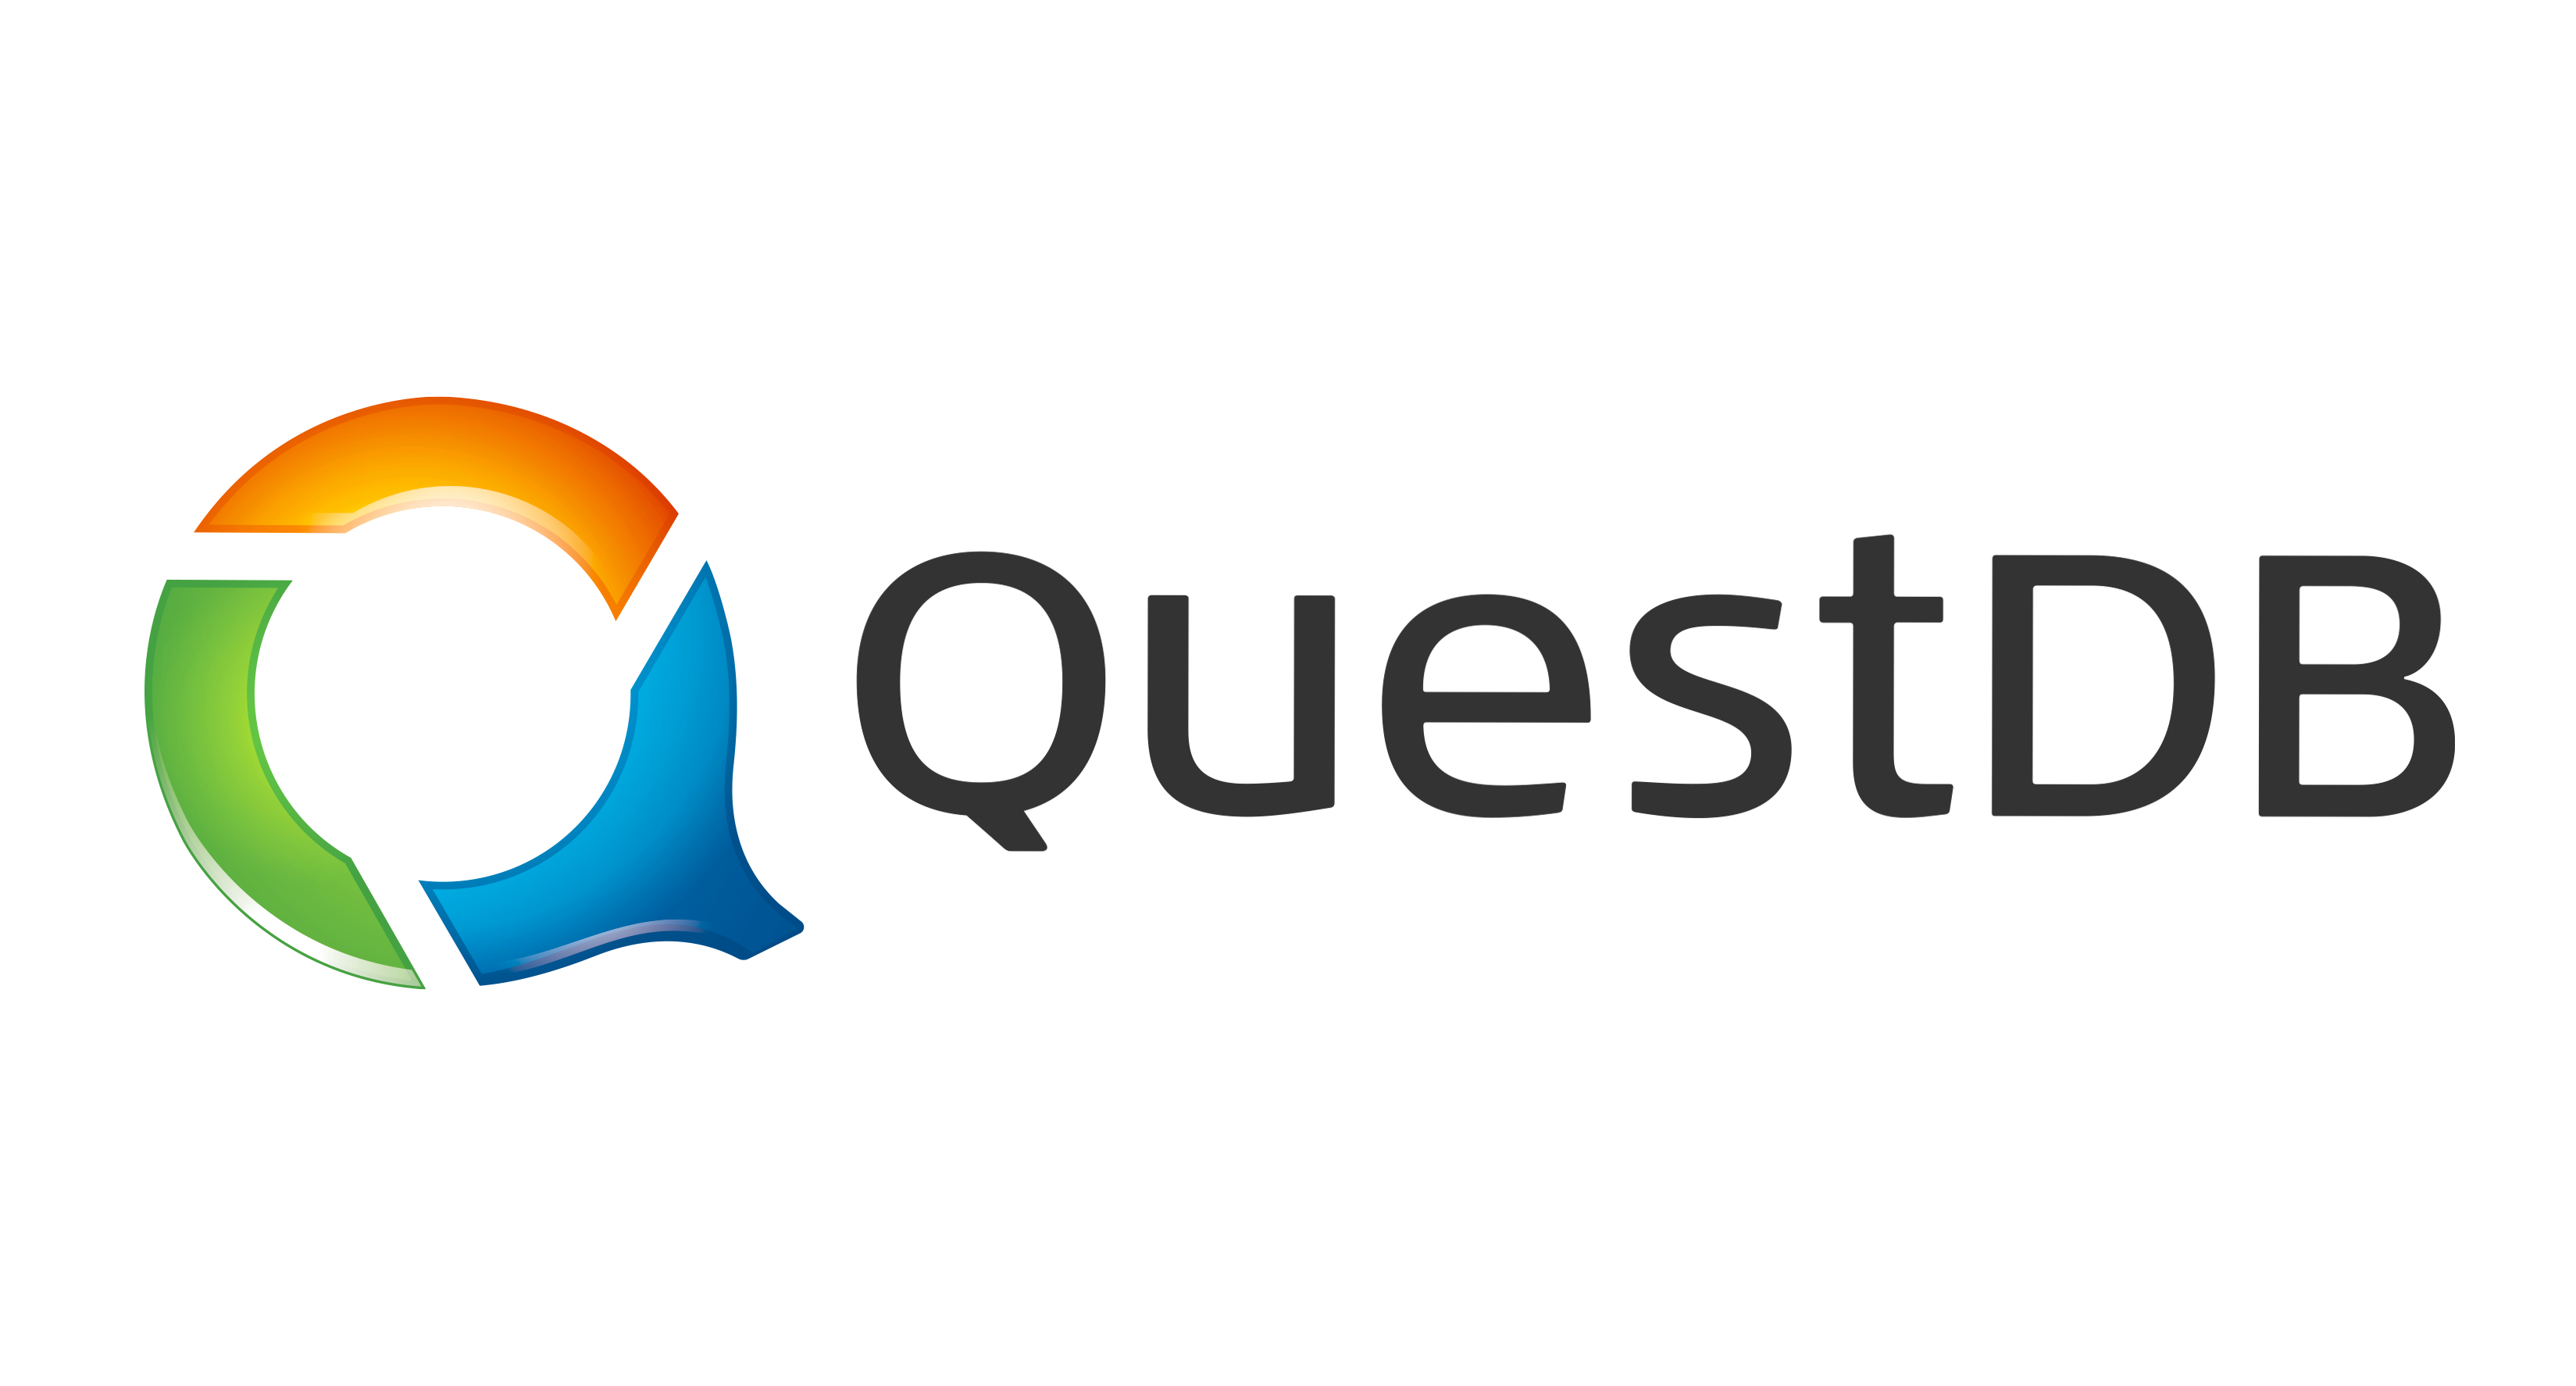

## Reasons to love QuestDB ?
#### 1) Easily switch to embedded
#### 2) Cloud native
#### 3) Lesser development costs
#### 4) Lesser hardware requirements
#### 5) Ability to generate Real time insights
#### 6) Easy and secure Enterprise integration
#### 7) Postgres wire support

## Installation using Docker:

### Step 1: Installing Docker
Follow the instructions here and choose the docker installer based on your Operating system: https://docs.docker.com/engine/install/

### Step 2: Pulling the QuestDB image and creating a docker container.
`docker run -p 9000:9000 -p 8812:8812 questdb/questdb`

This parameter will publish a port to the host, you can specify:

    -p 9000:9000 for the REST API and the Web Console. The web console is available on http://localhost:9000
    -p 8812:8812 for the Postgres wire protocol
    -p 9009:9009 InfluxDB line protocol

### Step 3: Checking if the QuestDB container is running or not
Use `docker ps` to check container status.

### Step 4: Python and Jupyter installation
(1) Check python version with `python --version` or `python3 --version` (for Linux)

(2) If python is available then run `pip3 install requests urlib matplotlib pandas` to install modules required.

(3) Install jupyter using `pip3 install --upgrade ipython jupyter`.

(4) Enter `jupyter notebook` and then create a notebook.

# Creating a Database in QuestDB
We would generate some random data and store that data into a test database named weather which we would create.
The create statement in QuestDB pushes the data into the bottom of the table.
Our data is comprised of:
* `temp` is the temperature in Celcius.
* `rain24H` is the amount of precipitation in last 24 hours.
* `thunder` is a boolean returning True if thunder is present.
* `timestamp` is the date and time.
If the below code block prints `200`, it means the database was created successfully.
If it prints `400` then it means that database already exists.


In [33]:
import requests
import urllib.parse as par

q = 'create table weather'\
    '(temp int,'\
    'rain24H double,'\
    'thunder boolean,'\
    'timestamp timestamp)'\
    'timestamp(timestamp)'
r = requests.get("http://localhost:9000/exec?query=" + q)
print(r.status_code)

400


## Adding data to our Database
In the next code cell we generate and add 1000 entries of data to our database.

In [34]:
import requests
import random
from datetime import datetime
success = 0
fail = 0
random.seed()
for x in range(1000):
    temp = random.randint(-40, 55)
    rain24H = round(random.uniform(10.45, 235.15), 2)
    thunder = bool(random.getrandbits(1))
    query = "insert into weather values("\
        + str(temp) + ","\
        + str(rain24H) + "," \
        + str(thunder) +",systimestamp())"
    r = requests.get("http://localhost:9000/exec?query=" + query)
    if r.status_code == 200:
        success += 1
    else:
        fail += 1
    
print("Rows inserted: " + str(success))
if fail > 0:
    print("Rows Failed: " + str(fail))

Rows inserted: 1000


### Now let's try querying some data!

In [35]:
import requests
import io

r = requests.get("http://localhost:9000/exp?query=select * from weather")
rawData = r.text
print(rawData)


"tempF","rain24H","thunder","timestamp"
-37,234.0,false,"2020-08-24T11:41:37.191530Z"
-11,165.52,false,"2020-08-24T11:41:37.195714Z"
-31,178.13,true,"2020-08-24T11:41:37.202453Z"
14,31.470000000000,true,"2020-08-24T11:41:37.208365Z"
33,83.31,true,"2020-08-24T11:41:37.214347Z"
-10,31.150000000000,false,"2020-08-24T11:41:37.217252Z"
-19,39.01,false,"2020-08-24T11:41:37.220812Z"
-35,85.18,false,"2020-08-24T11:41:37.223685Z"
2,69.11,true,"2020-08-24T11:41:37.226314Z"
33,55.42,false,"2020-08-24T11:41:37.229131Z"
3,17.35,false,"2020-08-24T11:41:37.231709Z"
33,135.96,true,"2020-08-24T11:41:37.234207Z"
38,88.23,false,"2020-08-24T11:41:37.236800Z"
-17,130.83,false,"2020-08-24T11:41:37.239384Z"
47,211.53,true,"2020-08-24T11:41:37.242601Z"
-3,93.44,false,"2020-08-24T11:41:37.246126Z"
-19,113.14,true,"2020-08-24T11:41:37.249080Z"
-13,81.83,true,"2020-08-24T11:41:37.254148Z"
-23,40.76,true,"2020-08-24T11:41:37.256891Z"
37,17.31,true,"2020-08-24T11:41:37.259428Z"
-36,193.94,true,"2020-08-24T11:41:37

### Using Pandas to frame our data :

In [36]:
import pandas as pd

pData = pd.read_csv(io.StringIO(rawData), parse_dates=['timestamp'])
print(pData)


      tempF  rain24H  thunder                        timestamp
0       -37   234.00    False 2020-08-24 11:41:37.191530+00:00
1       -11   165.52    False 2020-08-24 11:41:37.195714+00:00
2       -31   178.13     True 2020-08-24 11:41:37.202453+00:00
3        14    31.47     True 2020-08-24 11:41:37.208365+00:00
4        33    83.31     True 2020-08-24 11:41:37.214347+00:00
...     ...      ...      ...                              ...
3995    -24   183.22    False 2020-08-24 11:58:32.164254+00:00
3996      1   151.96     True 2020-08-24 11:58:32.166610+00:00
3997    -40   213.86     True 2020-08-24 11:58:32.170839+00:00
3998    -33   101.91     True 2020-08-24 11:58:32.173131+00:00
3999    -38   182.98    False 2020-08-24 11:58:32.177191+00:00

[4000 rows x 4 columns]


***Note:** The query string _must_ be URL-encoded before it is sent.

In [50]:
import urllib.parse

q = "select tempF,"\
    " rain24H,"\
    " timestamp"\
    " from weather"\

query = urllib.parse.quote(q)
r = requests.get("http://localhost:9000/exp?query=" + query)
queryData = r.content
rawData = pd.read_csv(io.StringIO(queryData.decode('utf-8')))
print(rawData)

      tempF  rain24H                    timestamp
0       -37   234.00  2020-08-24T11:41:37.191530Z
1       -11   165.52  2020-08-24T11:41:37.195714Z
2       -31   178.13  2020-08-24T11:41:37.202453Z
3        14    31.47  2020-08-24T11:41:37.208365Z
4        33    83.31  2020-08-24T11:41:37.214347Z
...     ...      ...                          ...
3995    -24   183.22  2020-08-24T11:58:32.164254Z
3996      1   151.96  2020-08-24T11:58:32.166610Z
3997    -40   213.86  2020-08-24T11:58:32.170839Z
3998    -33   101.91  2020-08-24T11:58:32.173131Z
3999    -38   182.98  2020-08-24T11:58:32.177191Z

[4000 rows x 3 columns]


## Plotting our data:

<BarContainer object of 4000 artists>

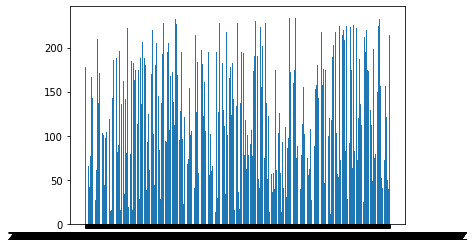

In [70]:
from matplotlib import pyplot as plt

plt.bar(rawData['timestamp'], rawData['rain24H'])

<BarContainer object of 4000 artists>

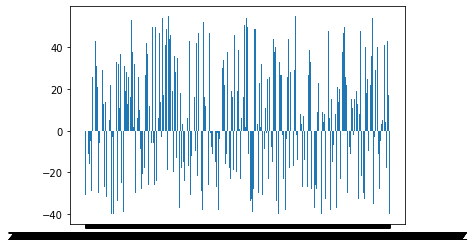

In [71]:
from matplotlib import pyplot as plt

plt.bar(rawData['timestamp'], rawData['tempF'])